In [ ]:
import numpy as np
import pandas as pd
from collections import deque
import pymongo
from pymongo import MongoClient
print( 'Mongo version', pymongo.__version__)

In [2]:
import networkx as nx
import csv

In [3]:
#main db
config = {
  'host': '127.0.0.1',
  'username': 'mongo_user',
  'password': 'password',
  'authSource': 'pin'
}

client = MongoClient(**config)

db = client.pin
collection1=db.users
collection2=db.sampled_users

In [4]:
collection2.find().count()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


1000

In [5]:
data = pd.DataFrame(list(collection2.find()))

In [6]:
data.head(2)

,_id,follower_count,followers,user_id
0,5b9840e1ab17aa0737f9248d,12,"[57517, 2061270, 344947, 848039, 7897696, 3226...",14574159
1,5b98464dab17aa07373da0eb,0\n,[],19257138


In [7]:
data.drop(columns={'_id','follower_count'},inplace=True)

In [8]:
data.head()

,followers,user_id
0,"[57517, 2061270, 344947, 848039, 7897696, 3226...",14574159
1,[],19257138
2,"[1254, 1343, 6185, 7273, 9821, 12278, 23039, 1...",3953207
3,"[4845, 4085123, 10454297, 11542957, 32930995, ...",23698650
4,"[3712646, 12824077, 4385043, 56377115, 619333,...",18923125


In [9]:
count=1000
datalist=[]
for index,row in data.iterrows():
    nodes = [row['user_id']]
    followers=row['followers']
    if len(followers)!=0:
        last=followers.pop()
        followers.append(last.strip('\n'))
    nodes.extend(followers)
    datalist.append(nodes)
    count-=1
    if count == 0:
        break


In [10]:
len(datalist)

1000

In [11]:
data.to_csv('sample.txt',encoding='utf-8', index=False) #

In [12]:
num_rows = 1000
with open('newfun2.txt','w') as f:
    writer=csv.writer(f,delimiter=' ')
    writer.writerows(datalist[:num_rows])

G1=nx.read_adjlist('newfun2.txt')
len(list(nx.connected_components(G1))), len(G1.edges()) / len(G1.nodes())

(793, 0.9765369663191936)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

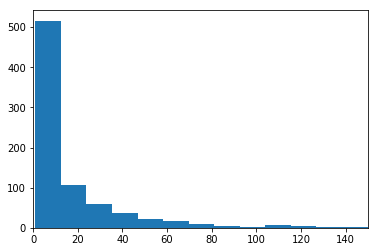

In [14]:
compt_size = [len(compt) for compt in nx.connected_components(G1)]
plt.hist(compt_size, bins = 1400);
plt.xlim(0,150);

In [33]:
large=[x for x in nx.connected_components(G1) if len(x)>100 ]


In [34]:
for component in large:
    print(len(component))

16031
126
114
110
113
137
140
111
136
108
153
114
137
109
124
118
161
122


In [41]:
for i in large:
    if len(i) == 161:
        component2 = i
    elif len(i) == 16031:
        component1 = i
    elif len(i) == 153:
        component3 = i
    else:
        pass

In [43]:
print(len(component1),len(component2),len(component3))

16031 161 153


In [44]:
component3

{'10267479',
 '10323573',
 '10334429',
 '1053231',
 '10663085',
 '1070956',
 '10717486',
 '10770231',
 '11015415',
 '1107889',
 '1109627',
 '111296',
 '111405',
 '1124891',
 '11292896',
 '1131638',
 '11526609',
 '11695713',
 '12038842',
 '12070851',
 '12095146',
 '12199814',
 '122922',
 '12444556',
 '12507837',
 '12569371',
 '125799',
 '1289394',
 '132248',
 '13301555',
 '1337147',
 '13546054',
 '13832102',
 '1385273',
 '1475',
 '1477661',
 '1484315',
 '14855361',
 '1506287',
 '15825771',
 '1598902',
 '1610505',
 '1628285',
 '1638564',
 '16729646',
 '16801873',
 '1746458',
 '1772607',
 '17798346',
 '1820689',
 '1820774',
 '1840132',
 '1902380',
 '1938804',
 '1988630',
 '2018552',
 '2020841',
 '2054851',
 '208308',
 '22255858',
 '2241864',
 '22769033',
 '2326903',
 '2467018',
 '2589064',
 '2597582',
 '2670061',
 '2753512',
 '2761245',
 '2773311',
 '2814187',
 '282291',
 '2920456',
 '3109186',
 '3113641',
 '31795808',
 '3211665',
 '3317021',
 '3409678',
 '3412571',
 '3454428',
 '3485',
 

In [35]:
%matplotlib notebook

In [45]:
G3=G1.subgraph(component3)

<IPython.core.display.Javascript object>


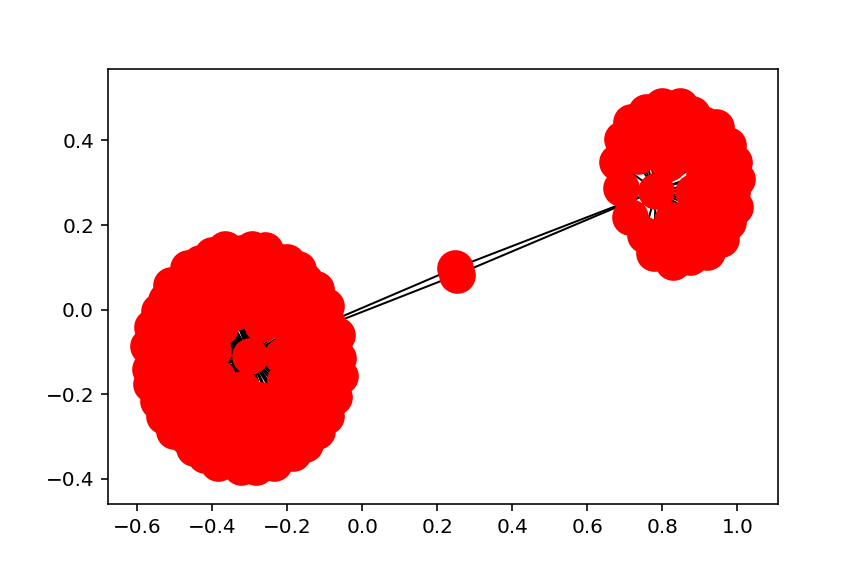

AttributeError: 'bool' object has no attribute 'items'

In [59]:
nx.draw_networkx(G2,labels=False)

In [56]:
G2=G1.subgraph(component2)

In [58]:
nx.draw_networkx(G2,labels=False)

AttributeError: 'bool' object has no attribute 'items'

In [20]:
len(G1.nodes())

29067

In [19]:
len(G1.edges())

28385